# Decision tree
Goal of the excercise is to code selected part of the Decision tree algorithm which is focused on the optimum split part using gini index. After that the scikit-learn implementation of the Decision tree will be used.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the iris.csv dataset
- Take a look at the rows
- Label is the *species* column - how many unique labels do we have and how distributed?

In [2]:
df = pd.read_csv('iris.csv')
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

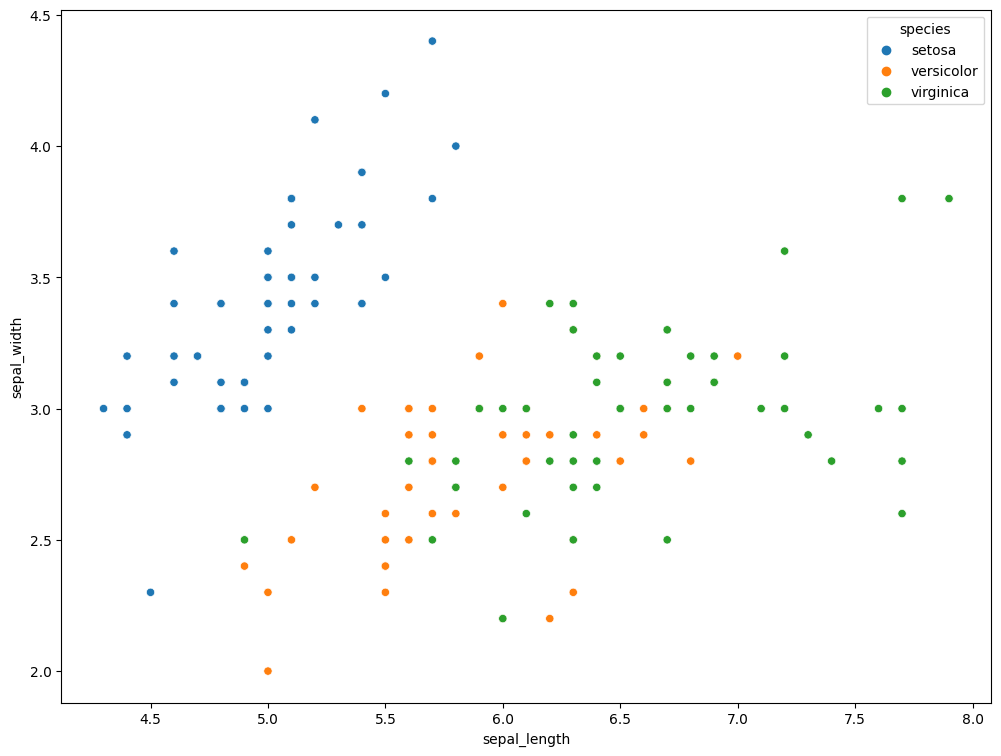

In [3]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='sepal_length', y='sepal_width', hue='species')

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

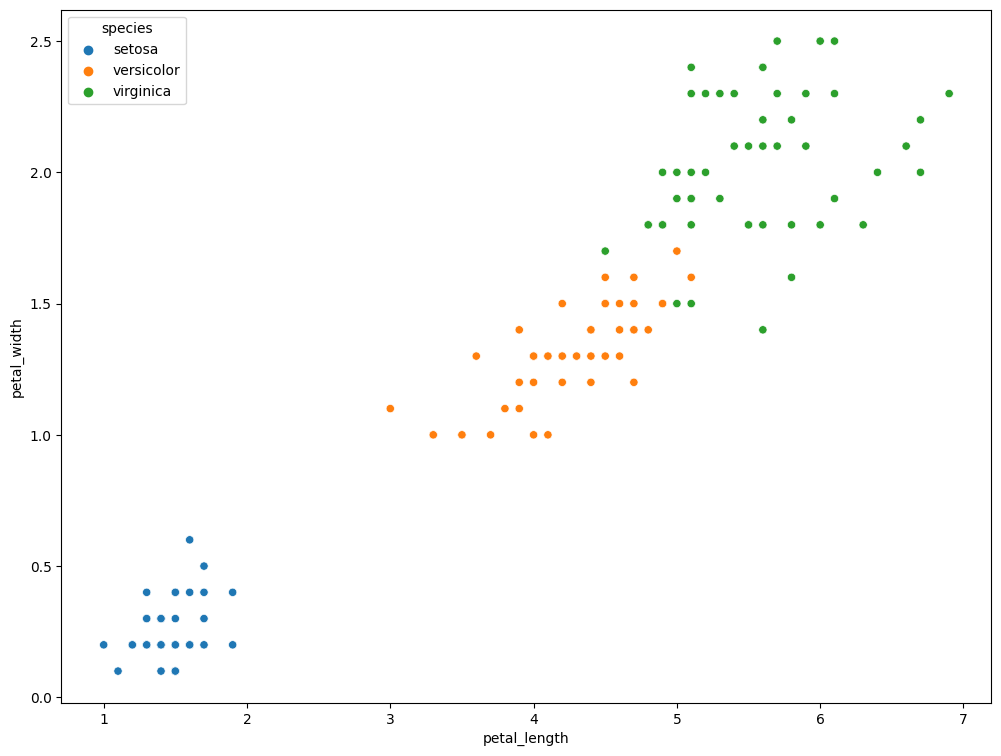

In [4]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')

In [5]:
df.species.value_counts()
df.species.unique()
df.loc[df.species == 'setosa'].shape[0]/df.shape[0]
0.33 **2
df.shape[0]
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

### Compute the gini index for the whole data set
- Take a look at the slides on my Homel for the formulas and examples
- What is the minimum and maximum value for 2 classes? And for three?
- What result should we expect for the whole data set?

- Compute probability for every label in *species* attribute in the *data* parameter and use it in the Gini index formula

In [6]:
def gini_index(data: pd.DataFrame):
    split_val = 3.35
    labels = data.species.unique()
    total_count = df.shape[0]
    lower_count = data.loc[data.sepal_width <= split_val].shape[0]
    higher_count = data.loc[data.sepal_width > split_val].shape[0]
    gini_part_left = 0
    gini_part_right = 0

    for label in labels:
        gini_part_left += pow(data.loc[(data.species == label) & (data.sepal_width <= split_val)].shape[0] / lower_count, 2)
        gini_part_right += pow(data.loc[(data.species == label) & (data.sepal_width > split_val)].shape[0] / higher_count, 2)

    gini_left = 1-gini_part_left
    gini_right = 1-gini_part_right
  
    gini_impurity = (lower_count / total_count) * gini_left + (higher_count / total_count) * gini_right

    return gini_impurity;


In [7]:
gini_index(df)

0.5462962962962963

### Take only the *sepal_width* attribute
- Try to split the by attribute by value 3.35 (<= 3.35)
- Compute the gini index for the left and the right side of the split
    - Left: 0.629
    - Right: 0.285
- Compute the total gini impurity for this split
    - Total: 0.546
    
**How to solve the example?**
$$
Gini(left) = 1 - \left[ \left(\frac{45}{114}\right)^2 + \left(\frac{49}{114}\right)^2 + \left(\frac{20}{114}\right)^2 \right] = 0.629
$$

$$
Gini(right) = 1 - \left[ \left(\frac{5}{36}\right)^2 + \left(\frac{1}{36}\right)^2 + \left(\frac{30}{36}\right)^2 \right] = 0.285
$$

$$
GiniImpurity = \frac{|df_{left}|}{|df|} * Gini(left) + \frac{|df_{right}|}{|df|} * Gini(right) =  \frac{114}{150} * 0.629 + \frac{36}{150} * 0.285 = 0.546
$$


114 je mensinch nez 3.35 a 36 je vetsich nez 3.35

GiniLeft
45 je versicolor, 49 virginica, 20 setosa //idk muze byt spatne

GiniRight
5je versicolor, 1 virginica, 30 setosa //idk muze byt spatne




In [8]:
def gini_index(data: pd.DataFrame, split_val : float, attribute : str):
    labels = data.species.unique()
    total_count = df.shape[0]
    lower_count = data.loc[data[attribute] <= split_val].shape[0]
    higher_count = data.loc[data[attribute] > split_val].shape[0]
    gini_part_left = 0
    gini_part_right = 0

    for label in labels:
        gini_part_left += pow(data.loc[(data.species == label) & (data[attribute]<= split_val)].shape[0] / lower_count, 2)
        gini_part_right += pow(data.loc[(data.species == label) & (data[attribute] > split_val)].shape[0] / higher_count, 2)

    gini_left = 1-gini_part_left
    gini_right = 1-gini_part_right
  
    gini_impurity = (lower_count / total_count) * gini_left + (higher_count / total_count) * gini_right

    return gini_impurity;


In [9]:
gini_index(df, 3.35, 'sepal_width')
#df.columns[1]


0.5462962962962963

## Repeat the process for the all 4 attributes and find the best split and gini impurity for all of them
- You will try all the possible boundaries along all the features, i.e. all the axes petal width and sepal width.
    - How to set the boundary? 
        - Select only the unique values of the chosen attribute (.unique() function)
        - Sort the values (np.sort())
        - Iterate over the array of the values, take every two consecutive numbers and compute their mean
        - The mean is the current split boundary
- For each split the algorithm will compute the Gini impurity of the two groups created.
- Finally you will choose the decision boundary (best split) that gives the lowest Gini impurity for the two groups from all the 4 attbibutes

### Results:
- index = 0, Sepal Length < 5.45, Gini = 0.44
- index = 1, Sepal Width < 3.35, Gini = 0.54
- index = 2, Petal Length < 2.45, Gini = 0.33
- index = 3, Petal Width < 0.80, Gini = 0.33

- **Selected split:** index = 2, Petal Length < 2.45, Gini = 0.33 (... or index = 3, Petal Width < 0.80, Gini = 0.33)

## If we have only this one split - how will the classification rule-set look like?

In [10]:
def print_splits(df: pd.DataFrame, column: str) -> None:
    selected_column = df[column].unique()
    selected_column.sort()
    lowest_gini = 1 #MAX GINI INDEX IS 1
    boundary = 0

    for item1, item2 in zip(selected_column[::1], selected_column[1::1]):
        mean = (item1 + item2)/2
        gini = gini_index(df, mean, column)
        print(f"Gini: {gini:.3f}, Boundary: {mean:.2f}")
        if gini <= lowest_gini:
            lowest_gini = gini
            boundary = mean
        
    # for i in range(0, len(selected_column)-1):
    #     mean = (selected_column[i] + selected_column[i+1]) / 2
    #     gini = gini_index(df, mean, column)
    #     print(f"Gini: {gini:.3f}, Boundary: {mean:.2f}")
    #     if gini <= lowest_gini:
    #         lowest_gini = gini
    #         boundary = mean

    print(f"Best -> Gini: {lowest_gini:.3f}, Boundary: {boundary:.2f}")

In [11]:
def find_splits(df: pd.DataFrame, column: str):
    selected_column = df[column].unique()
    selected_column.sort()
    lowest_gini = 1 #MAX GINI INDEX IS 1
    boundary = 0

    for item1, item2 in zip(selected_column[::1], selected_column[1::1]):
        mean = (item1 + item2)/2
        gini = gini_index(df, mean, column)
        if gini <= lowest_gini:
            lowest_gini = gini
            boundary = mean
        
    # for i in range(0, len(selected_column)-1):
    #     mean = (selected_column[i] + selected_column[i+1]) / 2
    #     gini = gini_index(df, mean, column)
    #     print(f"Gini: {gini:.3f}, Boundary: {mean:.2f}")
    #     if gini <= lowest_gini:
    #         lowest_gini = gini
    #         boundary = mean
    best_gini = round(lowest_gini,3)
    return best_gini, boundary

## sepal_length

In [12]:
print_splits(df, 'sepal_length')

Gini: 0.662, Boundary: 4.35
Gini: 0.648, Boundary: 4.45
Gini: 0.644, Boundary: 4.55
Gini: 0.624, Boundary: 4.65
Gini: 0.614, Boundary: 4.75
Gini: 0.587, Boundary: 4.85
Gini: 0.581, Boundary: 4.95
Gini: 0.547, Boundary: 5.05
Gini: 0.498, Boundary: 5.15
Gini: 0.482, Boundary: 5.25
Gini: 0.474, Boundary: 5.35
Gini: 0.439, Boundary: 5.45
Gini: 0.449, Boundary: 5.55
Gini: 0.475, Boundary: 5.65
Gini: 0.475, Boundary: 5.75
Gini: 0.492, Boundary: 5.85
Gini: 0.500, Boundary: 5.95
Gini: 0.512, Boundary: 6.05
Gini: 0.520, Boundary: 6.15
Gini: 0.528, Boundary: 6.25
Gini: 0.558, Boundary: 6.35
Gini: 0.580, Boundary: 6.45
Gini: 0.598, Boundary: 6.55
Gini: 0.591, Boundary: 6.65
Gini: 0.603, Boundary: 6.75
Gini: 0.608, Boundary: 6.85
Gini: 0.617, Boundary: 6.95
Gini: 0.609, Boundary: 7.05
Gini: 0.614, Boundary: 7.15
Gini: 0.629, Boundary: 7.25
Gini: 0.634, Boundary: 7.35
Gini: 0.639, Boundary: 7.50
Gini: 0.644, Boundary: 7.65
Gini: 0.662, Boundary: 7.80
Best -> Gini: 0.439, Boundary: 5.45


## sepal_width

In [13]:
print_splits(df, 'sepal_width')

Gini: 0.662, Boundary: 2.10
Gini: 0.659, Boundary: 2.25
Gini: 0.652, Boundary: 2.35
Gini: 0.639, Boundary: 2.45
Gini: 0.637, Boundary: 2.55
Gini: 0.629, Boundary: 2.65
Gini: 0.615, Boundary: 2.75
Gini: 0.593, Boundary: 2.85
Gini: 0.569, Boundary: 2.95
Gini: 0.555, Boundary: 3.05
Gini: 0.561, Boundary: 3.15
Gini: 0.556, Boundary: 3.25
Gini: 0.546, Boundary: 3.35
Gini: 0.581, Boundary: 3.45
Gini: 0.614, Boundary: 3.55
Gini: 0.618, Boundary: 3.65
Gini: 0.633, Boundary: 3.75
Gini: 0.639, Boundary: 3.85
Gini: 0.648, Boundary: 3.95
Gini: 0.653, Boundary: 4.05
Gini: 0.658, Boundary: 4.15
Gini: 0.662, Boundary: 4.30
Best -> Gini: 0.546, Boundary: 3.35


## petal_length

In [14]:
print_splits(df, 'petal_length')

Gini: 0.662, Boundary: 1.05
Gini: 0.658, Boundary: 1.15
Gini: 0.648, Boundary: 1.25
Gini: 0.614, Boundary: 1.35
Gini: 0.546, Boundary: 1.45
Gini: 0.448, Boundary: 1.55
Gini: 0.390, Boundary: 1.65
Gini: 0.353, Boundary: 1.80
Gini: 0.333, Boundary: 2.45
Gini: 0.343, Boundary: 3.15
Gini: 0.361, Boundary: 3.40
Gini: 0.376, Boundary: 3.55
Gini: 0.383, Boundary: 3.65
Gini: 0.390, Boundary: 3.75
Gini: 0.396, Boundary: 3.85
Gini: 0.412, Boundary: 3.95
Gini: 0.431, Boundary: 4.05
Gini: 0.439, Boundary: 4.15
Gini: 0.444, Boundary: 4.25
Gini: 0.444, Boundary: 4.35
Gini: 0.442, Boundary: 4.45
Gini: 0.434, Boundary: 4.55
Gini: 0.422, Boundary: 4.65
Gini: 0.393, Boundary: 4.75
Gini: 0.398, Boundary: 4.85
Gini: 0.409, Boundary: 4.95
Gini: 0.425, Boundary: 5.05
Gini: 0.471, Boundary: 5.15
Gini: 0.486, Boundary: 5.25
Gini: 0.500, Boundary: 5.35
Gini: 0.514, Boundary: 5.45
Gini: 0.533, Boundary: 5.55
Gini: 0.570, Boundary: 5.65
Gini: 0.587, Boundary: 5.75
Gini: 0.603, Boundary: 5.85
Gini: 0.614, Boundar

## petal_width

In [15]:
print_splits(df, 'petal_width')

Gini: 0.639, Boundary: 0.15
Gini: 0.471, Boundary: 0.25
Gini: 0.416, Boundary: 0.35
Gini: 0.353, Boundary: 0.45
Gini: 0.343, Boundary: 0.55
Gini: 0.333, Boundary: 0.80
Gini: 0.390, Boundary: 1.05
Gini: 0.407, Boundary: 1.15
Gini: 0.428, Boundary: 1.25
Gini: 0.443, Boundary: 1.35
Gini: 0.438, Boundary: 1.45
Gini: 0.405, Boundary: 1.55
Gini: 0.391, Boundary: 1.65
Gini: 0.391, Boundary: 1.75
Gini: 0.471, Boundary: 1.85
Gini: 0.507, Boundary: 1.95
Gini: 0.546, Boundary: 2.05
Gini: 0.581, Boundary: 2.15
Gini: 0.598, Boundary: 2.25
Gini: 0.639, Boundary: 2.35
Gini: 0.653, Boundary: 2.45
Best -> Gini: 0.333, Boundary: 0.80


## Split the data using the selected split criterion (note: use the one using petal_length)
### Repeat the whole process one more time for the part of the data with more than 1 class
### Find the best split again
### Draw the decision tree with the two defined levels you have created this way - you can use any graphic editor you like, even the MS Paint :-)

In [40]:
# Your code
best_gini, best_split = find_splits(df, 'petal_length')
print(f"Best -> Gini: {best_gini:.3f}, Boundary: {best_split:.2f}")

df_left = df.loc[(df['petal_length'] <= best_split)]
print(f'Samples setosa: {df_left.shape[0]}')
df_right = df.loc[(df['petal_length'] > best_split)]
print(f'Samples no setosa: {df_right.shape[0]}')

left_second_best_gini, left_second_best_split = find_splits(df_left, 'petal_length')
print(f"df_left --> Best -> Gini: {left_second_best_gini:.3f}, Boundary: {left_second_best_split:.2f}")

right_second_best_gini, right_secondt_best_split = find_splits(df_right, 'petal_length')
print(f"df_right --> Best -> Gini: {right_second_best_gini:.3f}, Boundary: {right_secondt_best_split:.2f}")


df_right_left = df_right.loc[(df_right['petal_length'] <= right_secondt_best_split)]
print(f'Samples right_left: {df_right_left.shape[0]}')
df_right_right = df_right.loc[(df_right['petal_length'] > right_secondt_best_split)]
print(f'Samples right_right: {df_right_right.shape[0]}')

right_left_second_best_gini, right_left_second_best_split = find_splits(df_right_left, 'petal_length')
print(f"df_right_left --> Best -> Gini: {right_left_second_best_gini:.3f}, Boundary: {right_left_second_best_split:.2f}")

right_right_second_best_gini, right_right_secondt_best_split = find_splits(df_right_right, 'petal_length')
print(f"df_right_right --> Best -> Gini: {right_right_second_best_gini:.3f}, Boundary: {right_right_secondt_best_split:.2f}")


df_right_left_count_versicolor = df_right_left.loc[df_right_left['species']== 'versicolor']
print(f'Samples right left versicolor: {df_right_left_count_versicolor.shape[0]}')
df_right_left_count_virginica = df_right_left.loc[df_right_left['species']== 'virginica']
print(f'Samples right left virginica: {df_right_left_count_virginica.shape[0]}')

df_right_right_count_versicolor = df_right_right.loc[df_right_right['species']== 'versicolor']
print(f'Samples right right versicolor: {df_right_right_count_versicolor.shape[0]}')
df_right_right_count_virginica = df_right_right.loc[df_right_right['species']== 'virginica']
print(f'Samples right right versicolor: {df_right_right_count_virginica.shape[0]}')

# df_right_versicolor = df.loc[(df['species'] == 'versicolor')]

# print(f'Samples: {df_right_versicolor.shape[0]}')




Best -> Gini: 0.333, Boundary: 2.45
Samples setosa: 50
Samples no setosa: 100
df_left --> Best -> Gini: 0.000, Boundary: 1.80
df_right --> Best -> Gini: 0.084, Boundary: 4.75
Samples right_left: 45
Samples right_right: 55
df_right_left --> Best -> Gini: 0.013, Boundary: 4.45
df_right_right --> Best -> Gini: 0.054, Boundary: 5.05
Samples right left versicolor: 44
Samples right left virginica: 1
Samples right right versicolor: 6
Samples right right versicolor: 49


![Decision Tree](decisiontree.drawio.svg)

In [17]:
print_splits(df, 'petal_length')

Gini: 0.662, Boundary: 1.05
Gini: 0.658, Boundary: 1.15
Gini: 0.648, Boundary: 1.25
Gini: 0.614, Boundary: 1.35
Gini: 0.546, Boundary: 1.45
Gini: 0.448, Boundary: 1.55
Gini: 0.390, Boundary: 1.65
Gini: 0.353, Boundary: 1.80
Gini: 0.333, Boundary: 2.45
Gini: 0.343, Boundary: 3.15
Gini: 0.361, Boundary: 3.40
Gini: 0.376, Boundary: 3.55
Gini: 0.383, Boundary: 3.65
Gini: 0.390, Boundary: 3.75
Gini: 0.396, Boundary: 3.85
Gini: 0.412, Boundary: 3.95
Gini: 0.431, Boundary: 4.05
Gini: 0.439, Boundary: 4.15
Gini: 0.444, Boundary: 4.25
Gini: 0.444, Boundary: 4.35
Gini: 0.442, Boundary: 4.45
Gini: 0.434, Boundary: 4.55
Gini: 0.422, Boundary: 4.65
Gini: 0.393, Boundary: 4.75
Gini: 0.398, Boundary: 4.85
Gini: 0.409, Boundary: 4.95
Gini: 0.425, Boundary: 5.05
Gini: 0.471, Boundary: 5.15
Gini: 0.486, Boundary: 5.25
Gini: 0.500, Boundary: 5.35
Gini: 0.514, Boundary: 5.45
Gini: 0.533, Boundary: 5.55
Gini: 0.570, Boundary: 5.65
Gini: 0.587, Boundary: 5.75
Gini: 0.603, Boundary: 5.85
Gini: 0.614, Boundar

# Introduction to the scikit-learn (Sklearn) library
Open source library for predictive data analysis. Contains algorithms for classification, clustering and others.

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Let's start with splitting the data into the input and output part
- Usually named as a *X* and *y* variables

In [19]:
X, y= df.loc[:, df.columns != "species"], df["species"]

In [20]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [21]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## What is the size of our data?

In [22]:
X.shape

(150, 4)

In [23]:
y.shape

(150,)

## There is a good practice to do evaluation process for every classification or regressions task.
- Do you know how to evaluate models?
- Do you know train test split method for evaluation? Do you know any different split method? How is it used?
- Do you know any different evaluation process?

## Lets continue with train test split process. Split dataset to train:test ratio 60:40. Check how many records/rows do you have in splitted variables.
- Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Take a look on data in variable y_test 
- Can you detect how many elements of each class is represented in test split?

In [25]:
X_train.shape

(90, 4)

In [26]:
X_test.shape

(60, 4)

In [27]:
y_train.shape

(90,)

In [28]:
y_test.shape

(60,)

## Create the Decision tree classifier instance

In [29]:
clf = DecisionTreeClassifier()

### Use *fit()* method for training of classifier

In [30]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Lets use trained model for the prediction part
- Get predictions via the method *predict()*

In [31]:
y_pred = clf.predict(X_test)
y_pred 

array(['virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

### Can we evaluate our model? How good is it? What does accuracy mean?

In [32]:
accuracy_score(y_test, y_pred)

0.9666666666666667

## How does the trained Decision tree look like?

### We can use either text representation as follows...

In [33]:
print(export_text(clf, show_weights=True, feature_names=list(X.columns.values)))

|--- petal_width <= 0.70
|   |--- weights: [27.00, 0.00, 0.00] class: setosa
|--- petal_width >  0.70
|   |--- petal_width <= 1.60
|   |   |--- petal_length <= 4.95
|   |   |   |--- weights: [0.00, 28.00, 0.00] class: versicolor
|   |   |--- petal_length >  4.95
|   |   |   |--- weights: [0.00, 0.00, 2.00] class: virginica
|   |--- petal_width >  1.60
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_width <= 3.10
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: virginica
|   |   |   |--- sepal_width >  3.10
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: versicolor
|   |   |--- petal_length >  4.85
|   |   |   |--- weights: [0.00, 0.00, 30.00] class: virginica



### ...or more convinient graphical diagram :-)

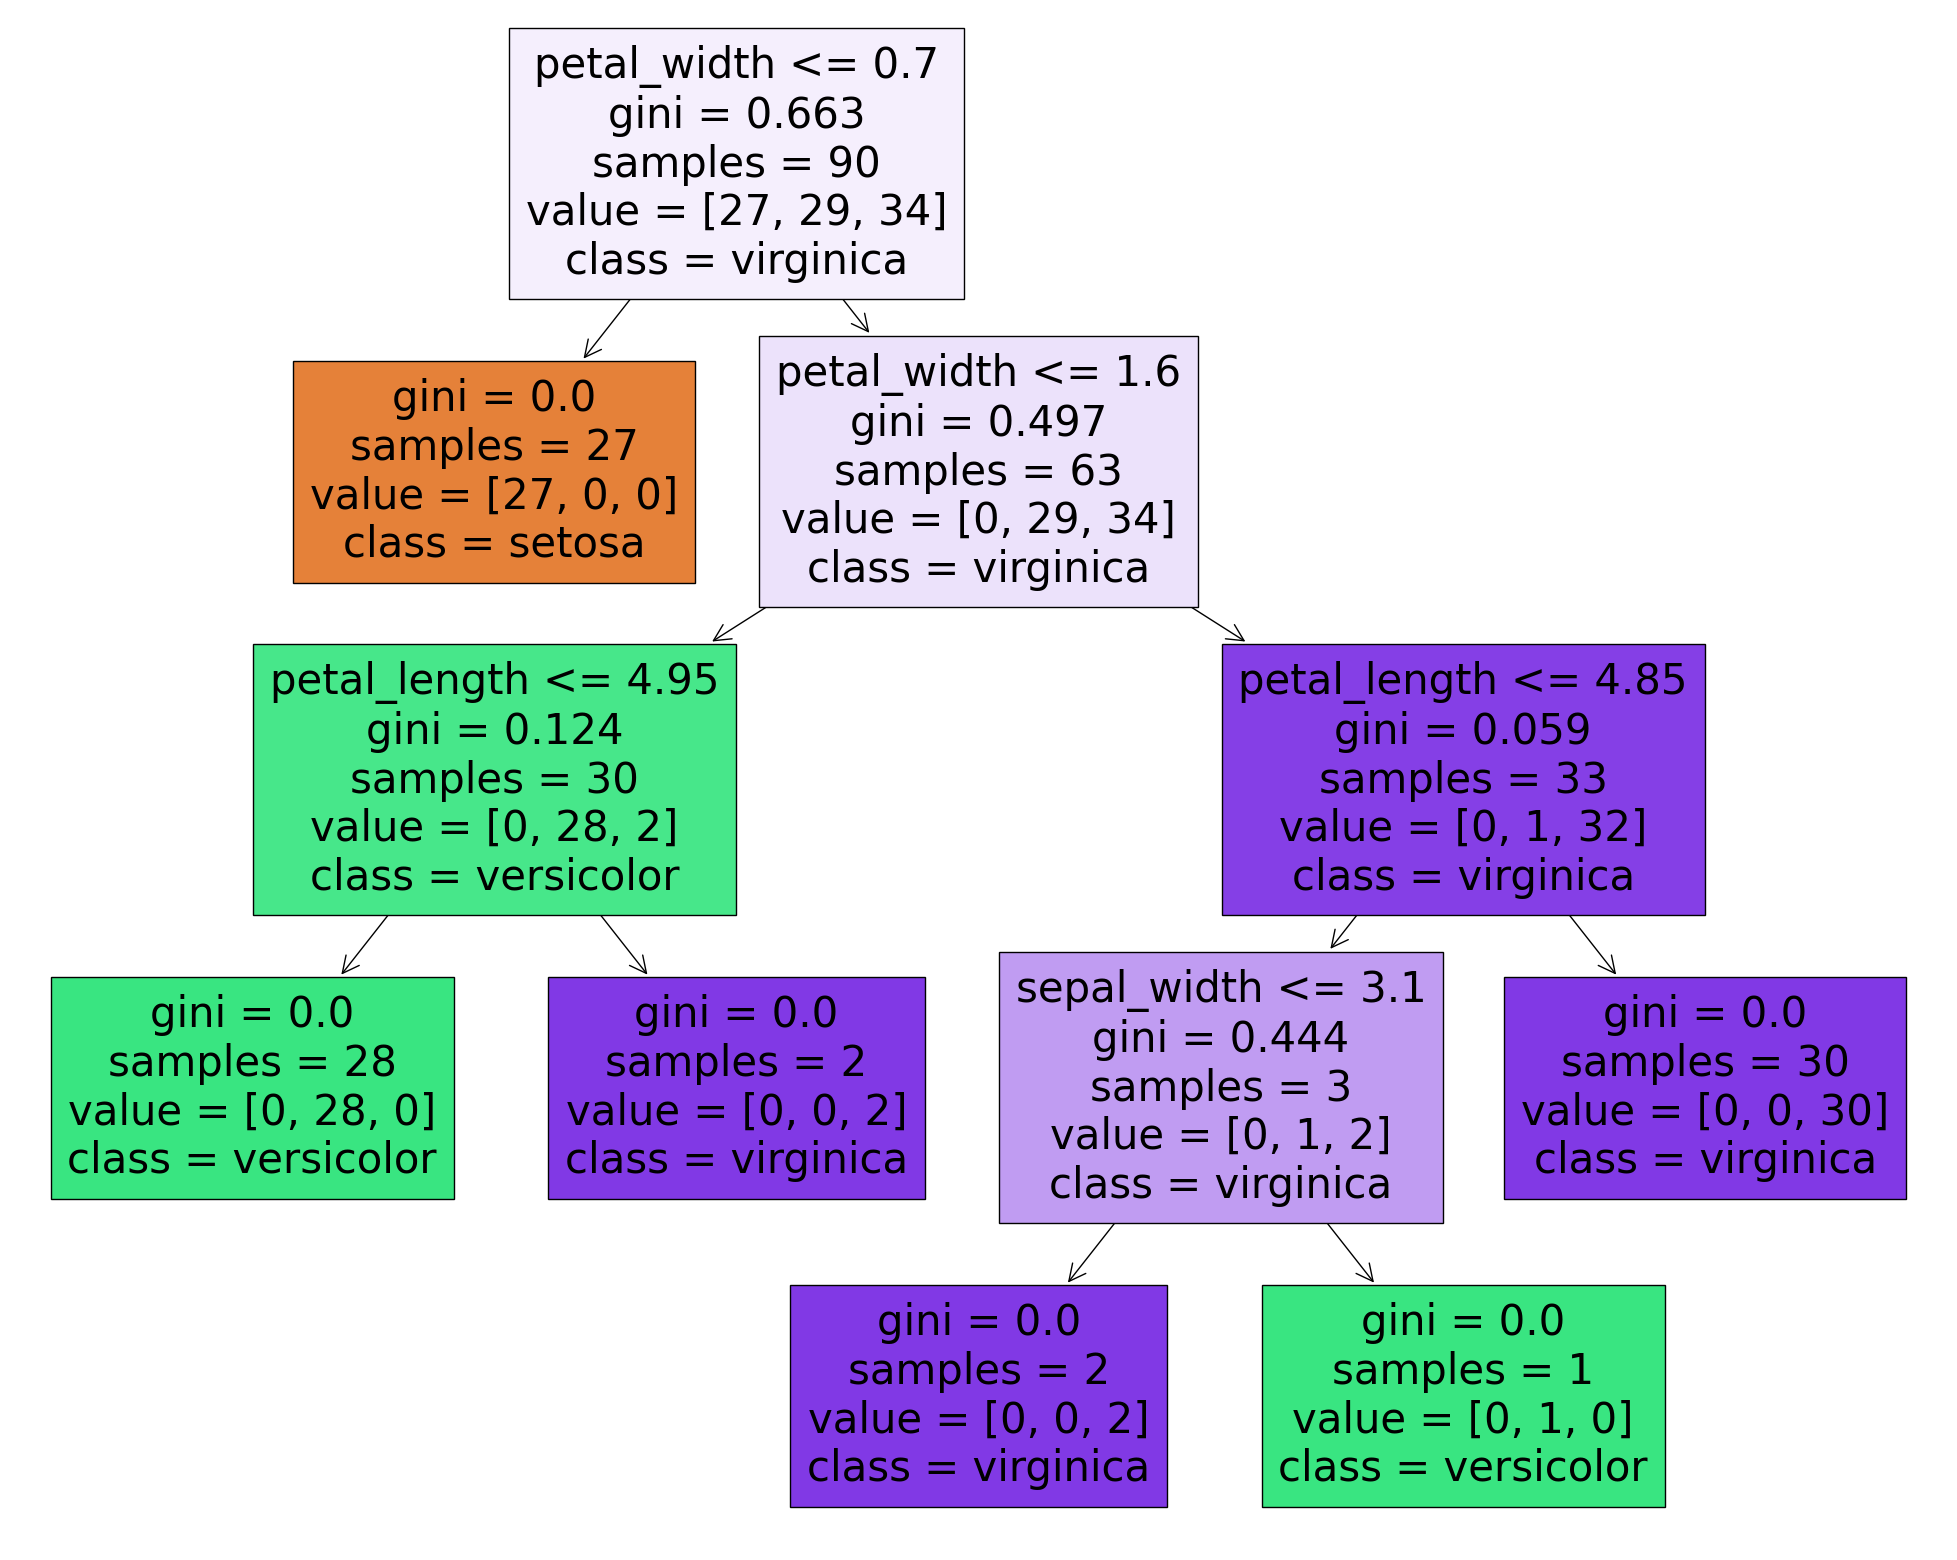

In [34]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=list(X.columns.values), filled=True, class_names=clf.classes_)

# Task (2b)
- Finish the implementation task from the exercise 